In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
#plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-whitegrid')
import matplotlib.cm as cm
#import matplotlib.font_manager as fm #para alterar as fontes dos graficos
#fonte = fm.FontProperties(family="Calibri", style="italic")
%matplotlib inline

#ignorando Warning inuteis
import warnings 
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.cluster._kmeans')

In [2]:
############################################################
print('*'*10, 'SALARIO/ENTRADAS', '*'*10)


salario = 4300.00
print('salario =', round(salario,2))

adicional_insalubridade = 282.4 # Grau médio
print('insalubridade =', adicional_insalubridade)
#fonte: https://genyo.com.br/adicional-de-insalubridade/

arredond_mes = 0.87

salario_total_0 = salario + adicional_insalubridade
salario_total = salario + adicional_insalubridade + arredond_mes
print('salario bruto =', round(salario_total,2), '\n')


############################################################
print('*'*10, 'DESCONTOS/SAIDAS', '*'*10,'\n')


print('*'*5, 'INSS', '*'*5)
# primeira parte -> até 1.412,00
p1 = 1412*(7.5/100)
# segunda parte -> 1.412,00 - 2.666,68
p2 = (2666.68 - 1412.00)*(9/100)
# terceira parte -> 2.666,68 - 4.000,03
p3 = (4000.03 - 2666.68)*(12/100)
# quarta parte -> 4.000,03 - 7.786,02
p4 = (salario_total_0 - 4000.03)*(14/100)
print('faixa de desconto INSS: (', round(p1,2),';', round(p2,2),';', round(p3,2),';', round(p4,2), ')')

INSS = round(p1+p2+p3+p4, 2)
print('INSS =', INSS,'\n')
# fonte: https://www.bloomberglinea.com.br/2024/02/20/tabela-de-desconto-do-inss-2024-valores-e-como-calcula-los/
# fonte: https://www.gov.br/inss/pt-br/assuntos/confira-as-aliquotas-de-contribuicao-ao-inss-com-o-aumento-do-salario-minimo


print('*'*5, 'OUTROS DESCONTOS', '*'*5)
qdt_dependente = 1
valor_por_dependente = 189.59 * qdt_dependente
print('dependentes =',round(valor_por_dependente, 2),'\n')


print('*'*5, 'I.R.R.F - imposto de renda', '*'*5)
IRPF = salario_total - INSS - valor_por_dependente
print('base calculo =', round(IRPF,2),'\n')
percent_IRRF = 22.5/100
print('porcentagem I.R.R.F =', str(round(percent_IRRF*100,2))+'%')
deducao_IRRF = 662.77
print('Dedução =', round(deducao_IRRF,2))

IRRF = (IRPF * percent_IRRF) - deducao_IRRF
print('I.R.R.F =', round(IRRF,2),'\n')
# fonte: " Imposto de Renda: Como calcular na folha de pagamento" [link = https://youtu.be/NfRrK5WlYNo?si=9NgyBrlDiiSvomdl]
# fonte 2: https://www.totvs.com/blog/fiscal-clientes/irrf-nova-tabela-progressiva-2024/

print('*'*5, 'VALE TRANSPORTE', '*'*5)
percent_vale_transporte = 6/100
vale_transporte = salario*percent_vale_transporte
print('Vale Transporte =', round(vale_transporte,2),'\n')



print('*'*10, 'TOTAL DESCONTOS', '*'*10)
total_descontos = INSS + IRRF + vale_transporte
print('total descontos =', round(total_descontos,2), '\n')



print('*'*10, 'SALARIO LIQUIDO', '*'*10)
salario_liquido = salario_total - total_descontos
print('salario liquido =', round(salario_liquido,2))

********** SALARIO/ENTRADAS **********
salario = 4300.0
insalubridade = 282.4
salario bruto = 4583.27 

********** DESCONTOS/SAIDAS ********** 

***** INSS *****
faixa de desconto INSS: ( 105.9 ; 112.92 ; 160.0 ; 81.53 )
INSS = 460.35 

***** OUTROS DESCONTOS *****
dependentes = 189.59 

***** I.R.R.F - imposto de renda *****
base calculo = 3933.33 

porcentagem I.R.R.F = 22.5%
Dedução = 662.77
I.R.R.F = 222.23 

***** VALE TRANSPORTE *****
Vale Transporte = 258.0 

********** TOTAL DESCONTOS **********
total descontos = 940.58 

********** SALARIO LIQUIDO **********
salario liquido = 3642.69


# =================================

# CRIANDO FUNÇÕES DE CALCULOS

In [3]:
############################################################
print('*'*10, 'SALARIO/ENTRADAS', '*'*10)

********** SALARIO/ENTRADAS **********


In [4]:
salario = 5000# float(input('Digite o valor do salario:')) #4300.00
print('salario =', round(salario,2))

#adicional_insalubridade = 282.4 # Grau médio
#print('insalubridade =', adicional_insalubridade)
#fonte: https://genyo.com.br/adicional-de-insalubridade/

#arredond_mes = 0.87

salario_total_0 = salario #+ adicional_insalubridade
salario_total = salario #+ arredond_mes #+ adicional_insalubridade
print('salario bruto =', round(salario_total,2), '\n')

salario = 5000
salario bruto = 5000 



In [5]:
############################################################
print('*'*10, 'DESCONTOS/SAIDAS', '*'*10,'\n')

********** DESCONTOS/SAIDAS ********** 



In [6]:
def calcular_inss(salario):
    inss = 0
    
    # primeira parte -> até 1.412,00
    if salario <= 1412.00:
        inss += salario*(7.5/100)
    else:
        inss += 1412.00*(7.5/100)

    # segunda parte -> 1.412,00 - 2.666,68
    if salario > 1412.00 and salario <= 2666.68:
        inss += (salario - 1412.00)*(9/100)
    elif salario > 2666.68:
        inss += (2666.68 - 1412.00)*(9/100)
    
    # terceira parte -> 2.666,68 - 4.000,03
    if salario > 2666.68 and salario <= 4000.03:
        inss += (salario - 2666.68)*(12/100)
    elif salario > 4000.03:
        inss += (4000.03 - 2666.68)*(12/100)
    
    # quarta parte -> 4.000,03 - 7.786,02
    if salario > 4000.03:
         inss += (salario - 4000.03)*(14/100)

    return round(inss, 2)

# Exemplo de uso da função
INSS = calcular_inss(salario_total_0)
print('INSS =', INSS)
# fonte: https://www.bloomberglinea.com.br/2024/02/20/tabela-de-desconto-do-inss-2024-valores-e-como-calcula-los/
# fonte: https://www.gov.br/inss/pt-br/assuntos/confira-as-aliquotas-de-contribuicao-ao-inss-com-o-aumento-do-salario-minimo

INSS = 518.82


In [7]:
print('*'*5, 'OUTROS DESCONTOS', '*'*5)
qdt_dependente = 1
valor_por_dependente = 189.59 * qdt_dependente
print('dependentes =',round(valor_por_dependente, 2),'\n')

***** OUTROS DESCONTOS *****
dependentes = 189.59 



In [8]:
print('*'*5, 'I.R.R.F - imposto de renda', '*'*5)
IRPF = salario_total - INSS - valor_por_dependente
print('base calculo =', round(IRPF,2),'\n')
def calcular_irrf(salario):
    if salario <= 2259.20:
        percent_IRRF = 0
        deducao_IRRF = 0 

    if salario > 2259.20 and salario <= 2862.65:
        percent_IRRF = 7.5
        deducao_IRRF = 169.44
        
    if salario > 2862.65 and salario <= 3751.05:
        percent_IRRF = 15
        deducao_IRRF = 381.44
        
    if salario > 3751.05 and salario <= 4663.68:
        percent_IRRF = 22.5
        deducao_IRRF = 662.77
        
    if salario > 4663.68:
        percent_IRRF = 27.5
        deducao_IRRF = 896.00

    # porcentagem I.R.R.F
    percent_IRRF = percent_IRRF/100
    # I.R.R.F
    IRRF = (salario * percent_IRRF) - deducao_IRRF

    return IRRF, percent_IRRF, deducao_IRRF

percent_IRRF  = calcular_irrf(IRPF)[1]
print('porcentagem I.R.R.F =', str(round(percent_IRRF*100,2))+'%')

deducao_IRRF  = calcular_irrf(IRPF)[2]
print('Dedução =', round(deducao_IRRF,2))

IRRF = calcular_irrf(IRPF)[0]
print('I.R.R.F =', round(IRRF,2),'\n')

# fonte: " Imposto de Renda: Como calcular na folha de pagamento" [link = https://youtu.be/NfRrK5WlYNo?si=9NgyBrlDiiSvomdl]
# fonte 2: https://www.totvs.com/blog/fiscal-clientes/irrf-nova-tabela-progressiva-2024/

***** I.R.R.F - imposto de renda *****
base calculo = 4291.59 

porcentagem I.R.R.F = 22.5%
Dedução = 662.77
I.R.R.F = 302.84 



In [9]:
print('*'*5, 'VALE TRANSPORTE', '*'*5)
percent_vale_transporte = 6/100
print('Taxa padrão vale transporte', str(6)+'%')
vale_transporte = salario*percent_vale_transporte
print('Vale Transporte =', round(vale_transporte,2),'\n')

***** VALE TRANSPORTE *****
Taxa padrão vale transporte 6%
Vale Transporte = 300.0 



In [10]:
############################################################
print('*'*10, 'TOTAL DESCONTOS', '*'*10)
total_descontos = INSS + IRRF + vale_transporte
print('total descontos =', round(total_descontos,2), '\n')

********** TOTAL DESCONTOS **********
total descontos = 1121.66 



In [11]:
############################################################
print('*'*10, 'SALARIO LIQUIDO', '*'*10)
salario_liquido = salario_total - total_descontos
print('salario liquido =', round(salario_liquido,2))

********** SALARIO LIQUIDO **********
salario liquido = 3878.34


# =================================

# PASSANDO LOOP PARA CRIAR TODAS FAIXAS DE SALARIOS (indo de 1.400 R$ Á 20.000 R$)

In [12]:
df = pd.DataFrame(columns=['salario','salario_total',
                           'INSS',
                           'percent_IRRF','deducao_IRRF','IRRF',
                           #'vale_transporte',
                           'total_descontos','salario_liquido'])

for salario in range(1400, 20100, 100):
    #adicional_insalubridade = 282.4
    #arredond_mes = 0.87
    
    salario_total_0 = salario #+ adicional_insalubridade
    salario_total = salario #+ arredond_mes #+ adicional_insalubridade 
    
    INSS = calcular_inss(salario_total_0)
    
    qdt_dependente = 0
    valor_por_dependente = 189.59 * qdt_dependente

    IRPF = salario_total - INSS - valor_por_dependente
    percent_IRRF  = calcular_irrf(IRPF)[1]
    deducao_IRRF  = calcular_irrf(IRPF)[2]
    IRRF = calcular_irrf(IRPF)[0]
    
    #percent_vale_transporte = 0 #6/100
    #vale_transporte = salario*percent_vale_transporte
    
    total_descontos = INSS + IRRF #+ vale_transporte
    salario_liquido = salario_total - total_descontos

    df.loc[len(df)] = [salario,salario_total,
                       INSS,
                       percent_IRRF,deducao_IRRF,IRRF,
                       #vale_transporte,
                       total_descontos,salario_liquido]
df

,salario,salario_total,INSS,percent_IRRF,deducao_IRRF,IRRF,total_descontos,salario_liquido
0,1400.0,1400.0,105.00,0.000,0.0,0.0000,105.0000,1295.0000
1,1500.0,1500.0,113.82,0.000,0.0,0.0000,113.8200,1386.1800
2,1600.0,1600.0,122.82,0.000,0.0,0.0000,122.8200,1477.1800
3,1700.0,1700.0,131.82,0.000,0.0,0.0000,131.8200,1568.1800
4,1800.0,1800.0,140.82,0.000,0.0,0.0000,140.8200,1659.1800
...,...,...,...,...,...,...,...,...
182,19600.0,19600.0,2562.82,0.275,896.0,3789.2245,6352.0445,13247.9555
183,19700.0,19700.0,2576.82,0.275,896.0,3812.8745,6389.6945,13310.3055
184,19800.0,19800.0,2590.82,0.275,896.0,3836.5245,6427.3445,13372.6555
185,19900.0,19900.0,2604.82,0.275,896.0,3860.1745,6464.9945,13435.0055


In [13]:
# salvando tabela todas faixas de salarios e descontos
df.to_excel('dados.xlsx', index=False)

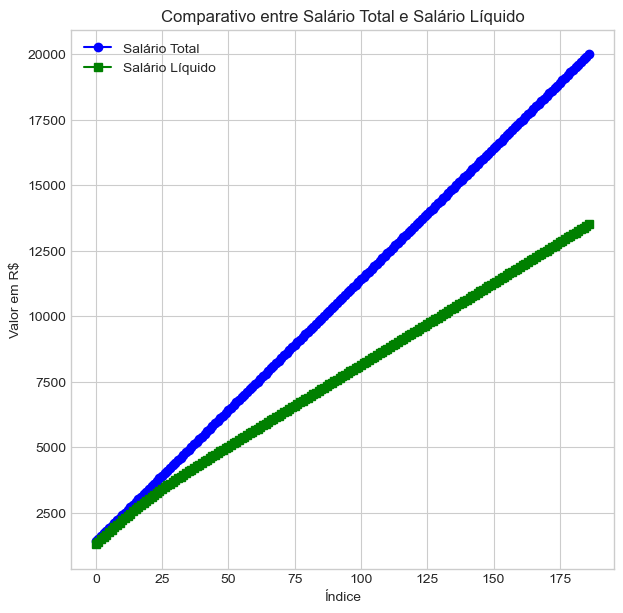

In [14]:
plt.figure(figsize=(7, 7))
plt.plot(df.index, df['salario_total'], label='Salário Total', color='blue', marker='o', linestyle='-')
plt.plot(df.index, df['salario_liquido'], label='Salário Líquido', color='green', marker='s', linestyle='-')

plt.title('Comparativo entre Salário Total e Salário Líquido')
plt.xlabel('Índice'); plt.ylabel('Valor em R$')

plt.legend()
plt.grid(True)
plt.show()

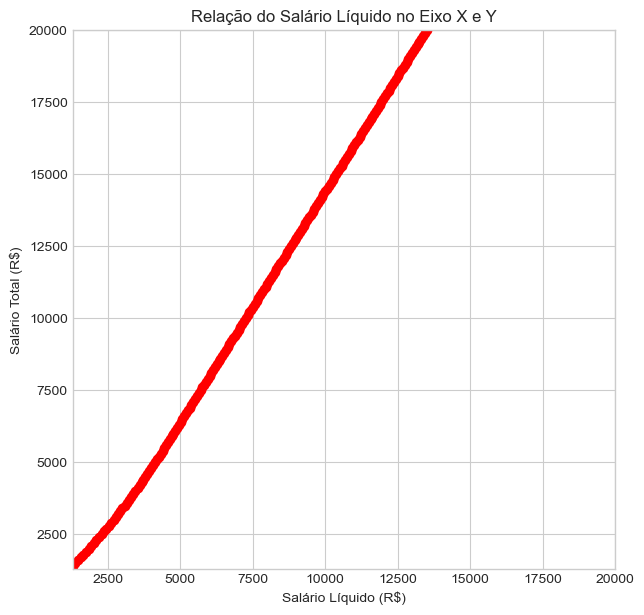

In [15]:
plt.figure(figsize=(7, 7))
plt.scatter(df['salario_liquido'], df['salario_total'], color='red', marker='o')

plt.title('Relação do Salário Líquido no Eixo X e Y')
plt.xlabel('Salário Líquido (R$)'); plt.ylabel('Salário Total (R$)')

minimo = min(pd.concat([df['salario_liquido'], df['salario_total']]))
maximo = max(pd.concat([df['salario_liquido'], df['salario_total']]))
plt.xlim(minimo, maximo)
plt.ylim(minimo, maximo)

plt.grid(True)
plt.show()